In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
import seaborn as sns
import random
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")
%matplotlib inline

In [85]:
data=pd.read_csv("navianceScraper/csv.csv")

In [86]:
data.head()

,type,act,sat2400,gpaWeighted,gpaCumulative,satConcorded,resultCode
0,RD,35,0,4.2120,3.9534,0,False
1,RD,27,2010,3.8983,3.8983,1410,False
2,RD,28,1930,3.6016,3.6016,1370,False
3,RD,28,1930,3.6016,3.6016,1370,False
4,RD,0,2160,3.4275,3.4275,1500,False


In [87]:
data.columns = ['type', 'act', 'sat2400', 'gpaWeighted', 'gpaCumulative', 'satConcorded', 'resultCode']

In [83]:
data['resultCode']=data['resultCode'].apply(lambda x: 0 if x =="False" else 1)

In [ ]:
data_subset=active_colleges[features]

In [ ]:
data_subset=data_subset.dropna(axis=0, how='all')
data_subset

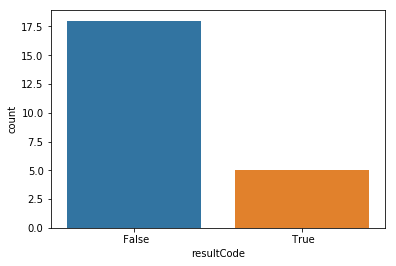

In [23]:
fig = sns.countplot("resultCode", data=data)

fig.get_figure().savefig("classImbalance.png")

In [24]:
train_y = data.resultCode
code = data.type
train_x = pd.DataFrame(data.drop(["resultCode", "type"], axis=1)).reset_index(drop=True)

In [89]:
type(data.resultCode)

pandas.core.series.Series

In [90]:
data.resultCode[1]

' False'

In [57]:
print("Before OverSampling, counts of label '1': {}".format(sum(train_y=="True")))
print("Before OverSampling, counts of label '0': {} \n".format(sum(train_y=="False")))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(train_x, train_y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res=="True")))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res=="False")))

Before OverSampling, counts of label '1': 0
Before OverSampling, counts of label '0': 0 



ValueError: Expected n_neighbors <= n_samples,  but n_samples = 5, n_neighbors = 6

In [33]:
train_x.shape

(23, 5)